<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01163204/blob/main/ActividadSemanal04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Nombre: Juan Carlos Torres Luna
### Matricula: A01163204
### Ciencia y analítica de datos (Gpo 10)
### 10/10/22
### Semana 4: Actividad semanal

# Parte 1: Ejercicio guiado

## Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

* Utilice la proporción acumulada de la varianza que explican los componentes para determinar la cantidad de varianza que explican los componentes principales.

In [1]:
import pandas as pd
import numpy as np

In [4]:
url = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"
df = pd.read_csv(url)
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [6]:
ndf1 = df.drop('ID', axis=1)
ndf1 = ndf1.rename(columns={'X1': 'Amount_of_given_credit'})
ndf1 = ndf1.rename(columns={'X2': 'Gender'})
ndf1 = ndf1.rename(columns={'X3': 'Education'})
ndf1 = ndf1.rename(columns={'X4': 'Marital_Status'})
ndf1 = ndf1.rename(columns={'X5': 'Age'})
ndf1 = ndf1.rename(columns={'X6': 'Pay01'})
ndf1 = ndf1.rename(columns={'X7': 'Pay02'})
ndf1 = ndf1.rename(columns={'X8': 'Pay03'})
ndf1 = ndf1.rename(columns={'X9': 'Pay04'})
ndf1 = ndf1.rename(columns={'X10': 'Pay05'})
ndf1 = ndf1.rename(columns={'X11': 'Pay06'})
ndf1 = ndf1.rename(columns={'X12': 'Amount_Bill_01'})
ndf1 = ndf1.rename(columns={'X13': 'Amount_Bill_02'})
ndf1 = ndf1.rename(columns={'X14': 'Amount_Bill_03'})
ndf1 = ndf1.rename(columns={'X15': 'Amount_Bill_04'})
ndf1 = ndf1.rename(columns={'X16': 'Amount_Bill_05'})
ndf1 = ndf1.rename(columns={'X17': 'Amount_Bill_06'})
ndf1 = ndf1.rename(columns={'X18': 'Amount_Prev_Pay_01'})
ndf1 = ndf1.rename(columns={'X19': 'Amount_Prev_Pay_02'})
ndf1 = ndf1.rename(columns={'X20': 'Amount_Prev_Pay_03'})
ndf1 = ndf1.rename(columns={'X21': 'Amount_Prev_Pay_04'})
ndf1 = ndf1.rename(columns={'X22': 'Amount_Prev_Pay_05'})
ndf1 = ndf1.rename(columns={'X23': 'Amount_Prev_Pay_06'})
ndf1 = ndf1.rename(columns={'Y': 'Credible_client'})
ndf1.head()

,Amount_of_given_credit,Gender,Education,Marital_Status,Age,Pay01,Pay02,Pay03,Pay04,Pay05,...,Amount_Bill_04,Amount_Bill_05,Amount_Bill_06,Amount_Prev_Pay_01,Amount_Prev_Pay_02,Amount_Prev_Pay_03,Amount_Prev_Pay_04,Amount_Prev_Pay_05,Amount_Prev_Pay_06,Credible_client
0,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [7]:
to_clean_education = (ndf1.Education == 0) | (ndf1.Education == 5) | (ndf1.Education == 6)
ndf1.loc[to_clean_education, 'Education'] = 4
ndf1['Education'].value_counts() 

2.0    14030
1.0    10585
3.0     4915
4.0      468
Name: Education, dtype: int64

In [8]:
to_clean_maritalStatus = (ndf1.Marital_Status == 0)
ndf1.loc[to_clean_maritalStatus, 'Marital_Status'] = 3
ndf1['Marital_Status'].value_counts()

2.0    15964
1.0    13657
3.0      377
Name: Marital_Status, dtype: int64

In [9]:
to_clean_Pay01  = (ndf1.Pay01 == -2) | (ndf1.Pay01 == -1) | (ndf1.Pay01 == 0)
to_clean_Pay02  = (ndf1.Pay02 == -2) | (ndf1.Pay02 == -1) | (ndf1.Pay02 == 0)
to_clean_Pay03  = (ndf1.Pay03 == -2) | (ndf1.Pay03 == -1) | (ndf1.Pay03 == 0)
to_clean_Pay04  = (ndf1.Pay04 == -2) | (ndf1.Pay04 == -1) | (ndf1.Pay04 == 0)
to_clean_Pay05  = (ndf1.Pay05 == -2) | (ndf1.Pay05 == -1) | (ndf1.Pay05 == 0)
to_clean_Pay06  = (ndf1.Pay06 == -2) | (ndf1.Pay06 == -1) | (ndf1.Pay06 == 0)

In [10]:
ndf1.loc[to_clean_Pay01, 'Pay01'] = 0
ndf1.loc[to_clean_Pay02, 'Pay02'] = 0
ndf1.loc[to_clean_Pay03, 'Pay03'] = 0
ndf1.loc[to_clean_Pay04, 'Pay04'] = 0
ndf1.loc[to_clean_Pay05, 'Pay05'] = 0
ndf1.loc[to_clean_Pay06, 'Pay06'] = 0

In [11]:
good_customer = (ndf1.Pay01 == 0) & (ndf1.Pay02 == 0) & (ndf1.Pay03 == 0) & (ndf1.Pay04 == 0) & (ndf1.Pay05 == 0) & (ndf1.Pay06 == 0) & (ndf1.Credible_client == 1)
potential_bad_customer = (ndf1.Pay01 > 0) & (ndf1.Pay02 > 0) & (ndf1.Pay03 > 0) & (ndf1.Pay04 > 0) & (ndf1.Pay05 > 0) & (ndf1.Pay06 > 0) & (ndf1.Credible_client == 0)

In [12]:
ndf1.loc[good_customer, 'Credible_client'] = 0
ndf1.loc[potential_bad_customer, 'Credible_client'] = 1

In [13]:
ndf1['Credible_client'].value_counts()

0.0    25299
1.0     4698
Name: Credible_client, dtype: int64

In [14]:
to_clean_AmountBill01 = (ndf1.Amount_Bill_01 < 0)
to_clean_AmountBill02 = (ndf1.Amount_Bill_02 < 0)
to_clean_AmountBill03 = (ndf1.Amount_Bill_03 < 0)
to_clean_AmountBill04 = (ndf1.Amount_Bill_04 < 0)
to_clean_AmountBill05 = (ndf1.Amount_Bill_05 < 0)
to_clean_AmountBill06 = (ndf1.Amount_Bill_06 < 0)

In [15]:
ndf1.loc[to_clean_AmountBill01, 'Amount_Bill_01'] = 0
ndf1.loc[to_clean_AmountBill02, 'Amount_Bill_02'] = 0
ndf1.loc[to_clean_AmountBill03, 'Amount_Bill_03'] = 0
ndf1.loc[to_clean_AmountBill04, 'Amount_Bill_04'] = 0
ndf1.loc[to_clean_AmountBill05, 'Amount_Bill_05'] = 0
ndf1.loc[to_clean_AmountBill06, 'Amount_Bill_06'] = 0

In [16]:
ndf1.columns

Index(['Amount_of_given_credit', 'Gender', 'Education', 'Marital_Status',
       'Age', 'Pay01', 'Pay02', 'Pay03', 'Pay04', 'Pay05', 'Pay06',
       'Amount_Bill_01', 'Amount_Bill_02', 'Amount_Bill_03', 'Amount_Bill_04',
       'Amount_Bill_05', 'Amount_Bill_06', 'Amount_Prev_Pay_01',
       'Amount_Prev_Pay_02', 'Amount_Prev_Pay_03', 'Amount_Prev_Pay_04',
       'Amount_Prev_Pay_05', 'Amount_Prev_Pay_06', 'Credible_client'],
      dtype='object')

In [18]:
ndf1.isnull().sum()

Amount_of_given_credit     0
Gender                     1
Education                  2
Marital_Status             2
Age                        5
Pay01                      3
Pay02                      5
Pay03                      7
Pay04                      9
Pay05                     16
Pay06                     14
Amount_Bill_01            11
Amount_Bill_02            11
Amount_Bill_03            13
Amount_Bill_04            15
Amount_Bill_05            17
Amount_Bill_06            10
Amount_Prev_Pay_01         8
Amount_Prev_Pay_02         9
Amount_Prev_Pay_03         8
Amount_Prev_Pay_04        11
Amount_Prev_Pay_05        11
Amount_Prev_Pay_06         5
Credible_client            3
dtype: int64

### Limpieza de datos nulos


In [19]:
# Limpieza de datos nulos

ndf2 = ndf1.copy()
ndf2

,Amount_of_given_credit,Gender,Education,Marital_Status,Age,Pay01,Pay02,Pay03,Pay04,Pay05,...,Amount_Bill_04,Amount_Bill_05,Amount_Bill_06,Amount_Prev_Pay_01,Amount_Prev_Pay_02,Amount_Prev_Pay_03,Amount_Prev_Pay_04,Amount_Prev_Pay_05,Amount_Prev_Pay_06,Credible_client
0,20000,2.0,2.0,1.0,24.0,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000,2.0,2.0,2.0,26.0,0.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000,1.0,2.0,1.0,57.0,0.0,0.0,0.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,150000,1.0,3.0,2.0,43.0,0.0,0.0,0.0,0.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,0.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,80000,1.0,3.0,1.0,41.0,1.0,0.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [20]:
gender_median = ndf2.Gender.median()
gender_median

education_median = ndf2.Education.median()
education_median

marital_status = ndf2.Marital_Status.median()
marital_status

age_median = ndf2.Age.median()
age_median

pay01_median = ndf2.Pay01.median()
pay02_median = ndf2.Pay02.median()
pay03_median = ndf2.Pay03.median()
pay04_median = ndf2.Pay04.median()
pay05_median = ndf2.Pay05.median()
pay06_median = ndf2.Pay06.median()

credible_client_median = ndf2.Credible_client.median()
credible_client_median

amount_of_given_credit_mean = ndf2.Amount_of_given_credit.mean()
amount_of_given_credit_mean

amount_bill_01_mean = ndf2.Amount_Bill_01.mean()
amount_bill_02_mean = ndf2.Amount_Bill_02.mean()
amount_bill_03_mean = ndf2.Amount_Bill_03.mean()
amount_bill_04_mean = ndf2.Amount_Bill_04.mean()
amount_bill_05_mean = ndf2.Amount_Bill_05.mean()
amount_bill_06_mean = ndf2.Amount_Bill_06.mean()

amount_prev_bill_01 = ndf2.Amount_Prev_Pay_01.mean()
amount_prev_bill_02 = ndf2.Amount_Prev_Pay_02.mean()
amount_prev_bill_03 = ndf2.Amount_Prev_Pay_03.mean()
amount_prev_bill_04 = ndf2.Amount_Prev_Pay_04.mean()
amount_prev_bill_05 = ndf2.Amount_Prev_Pay_05.mean()
amount_prev_bill_06 = ndf2.Amount_Prev_Pay_06.mean()

### Reemplazar valores nulos 

In [21]:
ndf2['Amount_of_given_credit'].fillna(value = amount_of_given_credit_mean, inplace = True)
ndf2['Gender'].fillna(value = gender_median, inplace = True)
ndf2['Education'].fillna(value = education_median, inplace = True)
ndf2['Marital_Status'].fillna(value = marital_status, inplace = True)
ndf2['Age'].fillna(value = age_median, inplace = True)
ndf2['Pay01'].fillna(value = pay01_median, inplace = True)
ndf2['Pay02'].fillna(value = pay02_median, inplace = True)
ndf2['Pay03'].fillna(value = pay03_median, inplace = True)
ndf2['Pay04'].fillna(value = pay04_median, inplace = True)
ndf2['Pay05'].fillna(value = pay05_median, inplace = True)
ndf2['Pay06'].fillna(value = pay06_median, inplace = True)
ndf2['Amount_Bill_01'].fillna(value = amount_bill_01_mean, inplace = True)
ndf2['Amount_Bill_02'].fillna(value = amount_bill_02_mean, inplace = True)
ndf2['Amount_Bill_03'].fillna(value = amount_bill_03_mean, inplace = True)
ndf2['Amount_Bill_04'].fillna(value = amount_bill_04_mean, inplace = True)
ndf2['Amount_Bill_05'].fillna(value = amount_bill_05_mean, inplace = True)
ndf2['Amount_Bill_06'].fillna(value = amount_bill_06_mean, inplace = True)
ndf2['Amount_Prev_Pay_01'].fillna(value = amount_prev_bill_01, inplace = True)
ndf2['Amount_Prev_Pay_02'].fillna(value = amount_prev_bill_02, inplace = True)
ndf2['Amount_Prev_Pay_03'].fillna(value = amount_prev_bill_03, inplace = True)
ndf2['Amount_Prev_Pay_04'].fillna(value = amount_prev_bill_04, inplace = True)
ndf2['Amount_Prev_Pay_05'].fillna(value = amount_prev_bill_05, inplace = True)
ndf2['Amount_Prev_Pay_06'].fillna(value = amount_prev_bill_06, inplace = True)
ndf2['Credible_client'].fillna(value = credible_client_median, inplace = True)

ndf2

,Amount_of_given_credit,Gender,Education,Marital_Status,Age,Pay01,Pay02,Pay03,Pay04,Pay05,...,Amount_Bill_04,Amount_Bill_05,Amount_Bill_06,Amount_Prev_Pay_01,Amount_Prev_Pay_02,Amount_Prev_Pay_03,Amount_Prev_Pay_04,Amount_Prev_Pay_05,Amount_Prev_Pay_06,Credible_client
0,20000,2.0,2.0,1.0,24.0,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000,2.0,2.0,2.0,26.0,0.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000,1.0,2.0,1.0,57.0,0.0,0.0,0.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,150000,1.0,3.0,2.0,43.0,0.0,0.0,0.0,0.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,0.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,80000,1.0,3.0,1.0,41.0,1.0,0.0,0.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [22]:
ndf2.isnull().sum()

Amount_of_given_credit    0
Gender                    0
Education                 0
Marital_Status            0
Age                       0
Pay01                     0
Pay02                     0
Pay03                     0
Pay04                     0
Pay05                     0
Pay06                     0
Amount_Bill_01            0
Amount_Bill_02            0
Amount_Bill_03            0
Amount_Bill_04            0
Amount_Bill_05            0
Amount_Bill_06            0
Amount_Prev_Pay_01        0
Amount_Prev_Pay_02        0
Amount_Prev_Pay_03        0
Amount_Prev_Pay_04        0
Amount_Prev_Pay_05        0
Amount_Prev_Pay_06        0
Credible_client           0
dtype: int64

### Eliminamos variables categoricas


In [24]:
ndf3 = ndf2.drop(['Gender','Education','Marital_Status','Pay01','Pay02','Pay03','Pay04','Pay05','Pay06'], axis = 1)
ndf3

,Amount_of_given_credit,Age,Amount_Bill_01,Amount_Bill_02,Amount_Bill_03,Amount_Bill_04,Amount_Bill_05,Amount_Bill_06,Amount_Prev_Pay_01,Amount_Prev_Pay_02,Amount_Prev_Pay_03,Amount_Prev_Pay_04,Amount_Prev_Pay_05,Amount_Prev_Pay_06,Credible_client
0,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,150000,43.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,30000,37.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,80000,41.0,0.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


### PCA

In [72]:
from sklearn.decomposition import PCA
from sklearn import preprocessing


In [73]:
pcs = PCA()
pcs.fit(preprocessing.scale(ndf3))
pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
                          )
pcsSummary

,Standard deviation,Proportion of variance,Cumulative proportion
0,2.434591,0.395136,0.395136
1,1.328868,0.117722,0.512858
2,1.035360,0.071462,0.584320
3,0.994209,0.065895,0.650215
4,0.953180,0.060568,0.710783
5,0.937741,0.058622,0.769405
6,0.932695,0.057993,0.827398
7,0.882385,0.051905,0.879303
8,0.851830,0.048373,0.927676
9,0.815209,0.044303,0.971978


In [74]:
pcsSummary = pcsSummary.transpose()
pcsSummary.round(2)
pcsSummary.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary.columns) + 1)]
pcsSummary = pcsSummary.round(4)
pcsSummary

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
Standard deviation,2.4346,1.3289,1.0354,0.9942,0.9532,0.9377,0.9327,0.8824,0.8518,0.8152,0.5105,0.2660,0.2014,0.1584,0.1525
Proportion of variance,0.3951,0.1177,0.0715,0.0659,0.0606,0.0586,0.0580,0.0519,0.0484,0.0443,0.0174,0.0047,0.0027,0.0017,0.0015
Cumulative proportion,0.3951,0.5129,0.5843,0.6502,0.7108,0.7694,0.8274,0.8793,0.9277,0.9720,0.9894,0.9941,0.9968,0.9985,1.0000


In [42]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

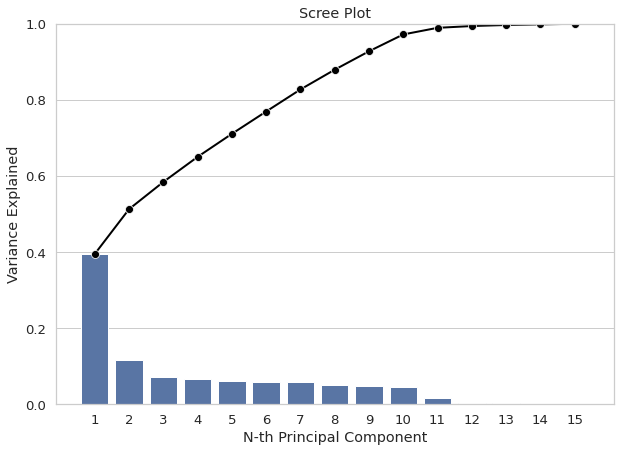

In [75]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

## Paso 2: Interprete cada componente principal en términos de las variables originales

* Examine la magnitud y la dirección de los coeficientes de las variables originales.
Nota: Cuanto mayor sea el valor absoluto del coeficiente, más importante será la variable correspondiente en el cálculo del componente.

In [76]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns=pcsSummary.columns,
                                index=ndf3.columns
                                )
pcsComponents_df.iloc[:,:11]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Amount_of_given_credit,0.165886,0.321180,-0.423961,-0.050806,-0.072164,0.014724,-0.050572,0.092471,0.077662,-0.814900,-0.010084
Age,0.032748,0.069883,-0.616026,0.716108,0.106753,-0.009098,0.046048,-0.068438,-0.025964,0.287470,-0.012109
Amount_Bill_01,0.372327,-0.179794,-0.080767,-0.068780,-0.016114,-0.023602,-0.047616,0.006676,0.006296,0.037421,0.563679
Amount_Bill_02,0.382987,-0.167477,-0.039211,-0.050753,0.053300,-0.057515,-0.036682,-0.033621,-0.133577,0.018450,0.386004
Amount_Bill_03,0.388037,-0.124721,0.016489,-0.019609,0.083273,-0.122371,0.075014,-0.119041,0.096635,0.013767,0.120929
Amount_Bill_04,0.391373,-0.121018,0.029792,0.005904,0.074254,-0.015836,0.014354,0.124596,0.036340,0.025536,-0.206031
Amount_Bill_05,0.388174,-0.109820,0.038720,0.014856,0.013229,0.131567,-0.062855,-0.006558,0.044978,0.021771,-0.420871
Amount_Bill_06,0.380718,-0.097837,0.025231,0.003773,-0.124228,0.110063,0.089093,0.010164,-0.008559,0.042149,-0.489741
Amount_Prev_Pay_01,0.135513,0.366222,0.225064,0.077617,0.377101,-0.171349,0.022358,-0.207191,-0.741764,-0.083223,-0.056306
Amount_Prev_Pay_02,0.117018,0.385341,0.286808,0.136127,0.273405,-0.230590,0.370471,-0.277734,0.590684,-0.011318,0.050289


In [78]:
print(pcsComponents_df.PC1.nlargest(4))
print(pcsComponents_df.PC1.nsmallest(4))

Amount_Bill_04    0.391373
Amount_Bill_05    0.388174
Amount_Bill_03    0.388037
Amount_Bill_02    0.382987
Name: PC1, dtype: float64
Credible_client      -0.012046
Age                   0.032748
Amount_Prev_Pay_06    0.106175
Amount_Prev_Pay_05    0.114061
Name: PC1, dtype: float64


In [79]:
print(pcsComponents_df.PC2.nlargest(4))
print(pcsComponents_df.PC2.nsmallest(4))

Amount_Prev_Pay_02    0.385341
Amount_Prev_Pay_03    0.370538
Amount_Prev_Pay_01    0.366222
Amount_Prev_Pay_04    0.333301
Name: PC2, dtype: float64
Credible_client   -0.254575
Amount_Bill_01    -0.179794
Amount_Bill_02    -0.167477
Amount_Bill_03    -0.124721
Name: PC2, dtype: float64


Entre mejor historial, mayor capacidad de mantener credito

In [80]:
print(pcsComponents_df.PC3.nlargest(4))
print(pcsComponents_df.PC3.nsmallest(4))

Credible_client       0.482347
Amount_Prev_Pay_02    0.286808
Amount_Prev_Pay_01    0.225064
Amount_Prev_Pay_03    0.216239
Name: PC3, dtype: float64
Age                      -0.616026
Amount_of_given_credit   -0.423961
Amount_Bill_01           -0.080767
Amount_Bill_02           -0.039211
Name: PC3, dtype: float64


La edad esta relacionada con un buen historial crediticio

In [81]:
print(pcsComponents_df.PC4.nlargest(4))
print(pcsComponents_df.PC4.nsmallest(4))

Age                   0.716108
Credible_client       0.644036
Amount_Prev_Pay_03    0.153156
Amount_Prev_Pay_02    0.136127
Name: PC4, dtype: float64
Amount_Prev_Pay_06       -0.083550
Amount_Bill_01           -0.068780
Amount_Prev_Pay_05       -0.064926
Amount_of_given_credit   -0.050806
Name: PC4, dtype: float64


Existe una campana de mejor pago para un cliente confiable

In [82]:
print(pcsComponents_df.PC5.nlargest(4))
print(pcsComponents_df.PC5.nsmallest(4))

Amount_Prev_Pay_01    0.377101
Amount_Prev_Pay_02    0.273405
Amount_Prev_Pay_03    0.134354
Age                   0.106753
Name: PC5, dtype: float64
Amount_Prev_Pay_05   -0.713612
Credible_client      -0.338761
Amount_Prev_Pay_06   -0.221897
Amount_Prev_Pay_04   -0.209746
Name: PC5, dtype: float64


In [83]:
print(pcsComponents_df.PC6.nlargest(4))
print(pcsComponents_df.PC6.nsmallest(4))

Amount_Prev_Pay_04    0.657574
Amount_Prev_Pay_03    0.272567
Amount_Bill_05        0.131567
Amount_Bill_06        0.110063
Name: PC6, dtype: float64
Amount_Prev_Pay_06   -0.574065
Amount_Prev_Pay_02   -0.230590
Amount_Prev_Pay_01   -0.171349
Credible_client      -0.137303
Name: PC6, dtype: float64


In [84]:
print(pcsComponents_df.PC7.nlargest(4))
print(pcsComponents_df.PC7.nsmallest(4))

Amount_Prev_Pay_05    0.522653
Amount_Prev_Pay_02    0.370471
Amount_Bill_06        0.089093
Amount_Bill_03        0.075014
Name: PC7, dtype: float64
Amount_Prev_Pay_06   -0.649714
Amount_Prev_Pay_04   -0.347929
Credible_client      -0.138474
Amount_Bill_05       -0.062855
Name: PC7, dtype: float64


In [85]:
print(pcsComponents_df.PC8.nlargest(4))
print(pcsComponents_df.PC8.nsmallest(4))

Amount_Prev_Pay_03        0.788677
Amount_Bill_04            0.124596
Amount_of_given_credit    0.092471
Amount_Prev_Pay_06        0.041979
Name: PC8, dtype: float64
Amount_Prev_Pay_04   -0.459519
Amount_Prev_Pay_02   -0.277734
Amount_Prev_Pay_01   -0.207191
Amount_Bill_03       -0.119041
Name: PC8, dtype: float64


In [86]:
print(pcsComponents_df.PC9.nlargest(4))
print(pcsComponents_df.PC9.nsmallest(4))

Amount_Prev_Pay_02        0.590684
Amount_Prev_Pay_06        0.123448
Amount_Bill_03            0.096635
Amount_of_given_credit    0.077662
Name: PC9, dtype: float64
Amount_Prev_Pay_01   -0.741764
Amount_Prev_Pay_05   -0.205542
Amount_Bill_02       -0.133577
Credible_client      -0.027801
Name: PC9, dtype: float64


## Paso 3: Identifique valores atípicos

* Realice alguna gráfica de valores atípicos o boxplot para identificar los valores atípicos. Cualquier punto que esté más alejado de la línea de referencia es un valor atípico.

[]

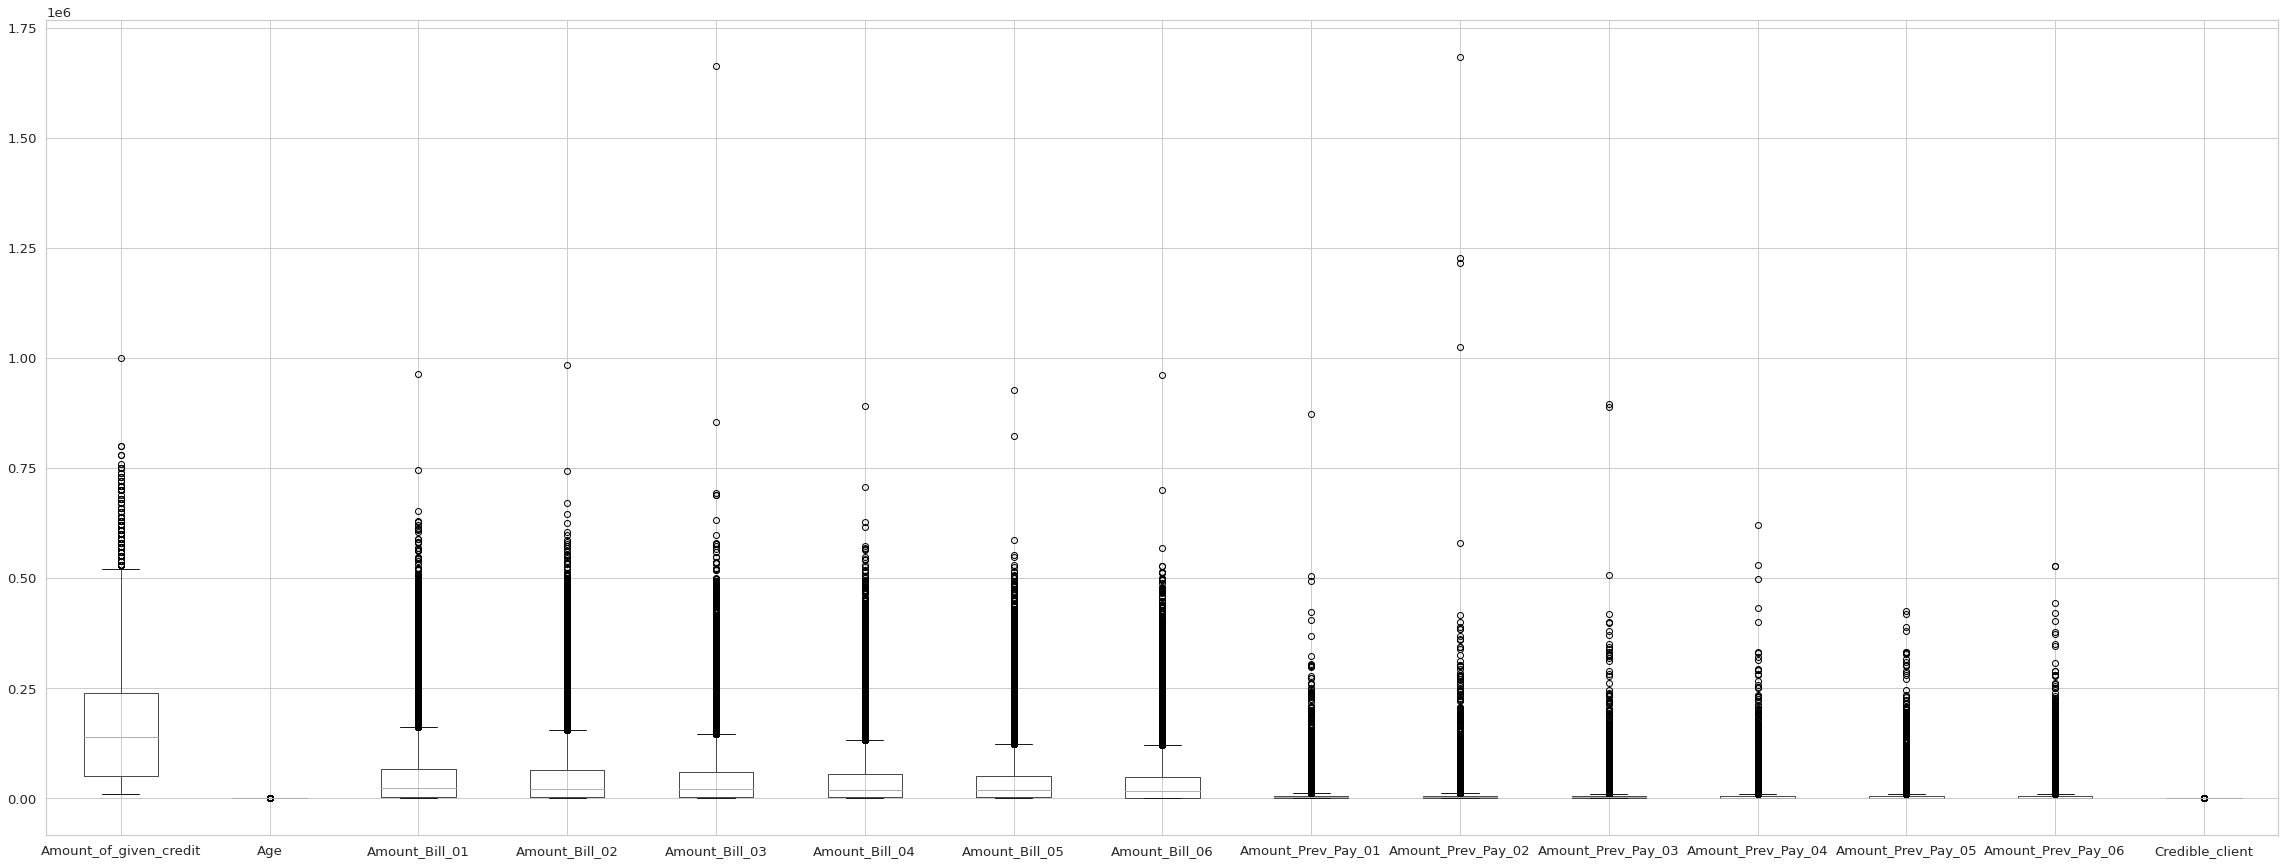

In [90]:
df_columns = ndf3.columns.to_list()
bp = ndf3.boxplot(figsize=(40, 15), column = df_columns, labels=df_columns)
bp.plot()

# Parte 2: Responde las siguientes preguntas en una celda de texto en Notebook

1. ¿Cuál es el número de componentes mínimo y por qué?
* Encontramos del 1ro al 11vo componente ya que en la gráfica se mostraron las torres visibles, de la 12va en adelante no se pueden apreciar barras lo suficientemente altas para usar su valor y sea significativo.   
2. ¿Cuál es la variación de los datos que representan esos componentes?
* La correlacion que se tiene entre variables, el como se relacionan y las que no tienen mucho que ver.
3. ¿Cuál es la pérdida de información después de realizar PCA?
* Las variables categoricas no se pueden tomar en cuenta en el análisis, esto nos pone en desventaja en comparacion con machine learning ya que si alguna de estas variables categoricas fuera de mayor importancia no lo veriamos en PCA
4. De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?
* Como importantes tenemos la edad, educación e historial de pagos
* Como no importantes se tienen genero, id, estatus marital 
5. ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?
* Cuando se tiene una base de datos pequena y manipulable relativamente fácil para una limpieza de datos mas sencilla y que además no requiera mucho análisis.
Por otro lado, tambien se puede ver como si fuera un complemento a la decisión de machine learning o un paso extra para un mejor entendimiento de la solución.